<a href="https://colab.research.google.com/github/seemapr22/Personal_Loan_Prediction/blob/main/Personal_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install zipcodes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.6/719.6 kB 9.9 MB/s eta 0:00:00


# Libraries


In [ ]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import zipcodes as zcode # to get zipcodes

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # To supress warnings

#--Sklearn library--

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn import metrics

#AUC ROC
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay #to plot confusion matric

from sklearn.svm import SVC                           # to build the model
from sklearn.linear_model import LogisticRegression   # to build the model
from sklearn.tree import DecisionTreeClassifier       # to build the model

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')   # to supress the warnings

# --Sklearn library--

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier                           # to build the model
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier   # to build the model
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#AUC ROC
from sklearn.metrics import roc_auc_score

# Read and Understand Data

In [ ]:
# Reading the csv file

df=pd.read_csv('/content/drive/MyDrive/Personal Loan /Bank_Personal_Loan_Modelling.csv')
df_loan=df.copy()


In [ ]:
df_loan.shape

(5000, 14)

In [ ]:
df_loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


In [ ]:
df_loan.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
# get the size of dataframe
print ("Rows     : " , df_loan.shape[0])  # get number of rows
print ("Columns  : " , df_loan.shape[1])  # get number of columns
print ("-"*40,"\n","Features : \n\n", df_loan.columns.tolist()) # get name of columns/features
print ("-"*40,"\nMissing values :\n\n", df_loan.isnull().sum().sort_values(ascending=False)) # missing values ?
print ("-"*40,"\nUnique values :  \n\n", df_loan.nunique())  #  count of unique values

Rows     :  5000
Columns  :  14
---------------------------------------- 
 Features : 

 ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
---------------------------------------- 
Missing values :

 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
---------------------------------------- 
Unique values :  

 ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            

In [ ]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


There are no missing values in the dataset. All the columns are numerical here. Personal loan is target variable. Zipcode Family,Education,Securities Account,CD account,online, Credit card are all categorical variables.

# **Data Preprocessing**

In [ ]:
df_loan.drop(['ID'],axis=1,inplace=True) #droping id

In [ ]:
df_loan.rename(columns={"ZIP Code":"ZIPCode","Personal Loan":"PersonalLoan","Securities Account":"SecuritiesAccount","CD Account":'CDAccount'},inplace=True)

Processing Zipcode

Zipcode is a categorical feature and can be a good predictor of target variable. We can analyse if there is any pattern on location for customers who had borrowed loaned during previous campaign. Trying to see if we can reduce the category

In [ ]:
df_loan.ZIPCode.nunique()

467

In [ ]:
# get unique zipcodes
list_zipcode=df_loan.ZIPCode.unique()

In [ ]:
# here I am creating a dictionary of county by using library zipcode and matching method.
dict_zip={}
for zipcode in list_zipcode:
    my_city_county = zcode.matching(zipcode.astype('str'))
    if len(my_city_county)==1: # if  zipcode is present then get county else, assign zipcode to county
        county=my_city_county[0].get('county')
    else:
        county=zipcode

    dict_zip.update({zipcode:county})


In [ ]:
dict_zip

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

We got almost all county expect for 96651,92634,93077,92717. We can fix this zip code by searching internet. Couldn't find for other zipcodes.

In [ ]:
dict_zip.update({92717:'Orange County'})
dict_zip.update({92634:'Orange County'})

In [ ]:
df_loan['County']=df_loan['ZIPCode'].map(dict_zip)

In [ ]:
df_loan.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County
0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0,Los Angeles County
1,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0,Los Angeles County
2,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0,Alameda County
3,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0,San Francisco County
4,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1,Los Angeles County


In [ ]:
df_loan.County.nunique()

40

In [ ]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   int64  
 1   Experience         5000 non-null   int64  
 2   Income             5000 non-null   int64  
 3   ZIPCode            5000 non-null   int64  
 4   Family             5000 non-null   int64  
 5   CCAvg              5000 non-null   float64
 6   Education          5000 non-null   int64  
 7   Mortgage           5000 non-null   int64  
 8   PersonalLoan       5000 non-null   int64  
 9   SecuritiesAccount  5000 non-null   int64  
 10  CDAccount          5000 non-null   int64  
 11  Online             5000 non-null   int64  
 12  CreditCard         5000 non-null   int64  
 13  County             5000 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


 **Fixing the Data Types**

Personal_Loan, Securities_Account, CD_Account, 'Online', 'CreditCard' ,Education are of int/object type, we can change them to category type to reduce the dataspace required.

In [ ]:
# converting categorical varaible to category type
category_col = ['PersonalLoan', 'SecuritiesAccount','Family', 'CDAccount', 'Online', 'CreditCard', 'ZIPCode', 'Education','County']
df_loan[category_col] = df_loan[category_col].astype('category')

In [ ]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                5000 non-null   int64   
 1   Experience         5000 non-null   int64   
 2   Income             5000 non-null   int64   
 3   ZIPCode            5000 non-null   category
 4   Family             5000 non-null   category
 5   CCAvg              5000 non-null   float64 
 6   Education          5000 non-null   category
 7   Mortgage           5000 non-null   int64   
 8   PersonalLoan       5000 non-null   category
 9   SecuritiesAccount  5000 non-null   category
 10  CDAccount          5000 non-null   category
 11  Online             5000 non-null   category
 12  CreditCard         5000 non-null   category
 13  County             5000 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 266.4 KB


we can see that the memory usage has decreased from 547 to 266.

In [ ]:
print(df_loan[category_col].info())
print('-'*60)
print(df_loan[category_col].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   PersonalLoan       5000 non-null   category
 1   SecuritiesAccount  5000 non-null   category
 2   Family             5000 non-null   category
 3   CDAccount          5000 non-null   category
 4   Online             5000 non-null   category
 5   CreditCard         5000 non-null   category
 6   ZIPCode            5000 non-null   category
 7   Education          5000 non-null   category
 8   County             5000 non-null   category
dtypes: category(9)
memory usage: 71.1 KB
None
------------------------------------------------------------
PersonalLoan           2
SecuritiesAccount      2
Family                 4
CDAccount              2
Online                 2
CreditCard             2
ZIPCode              467
Education              3
County                40
dtype: int64


Processing Experience

In [ ]:
# checking negative and zero values for experience.
df_loan[df_loan['Experience']<0]['Age'].describe()

count   52.00000
mean    24.51923
std      1.47516
min     23.00000
25%     24.00000
50%     24.00000
75%     25.00000
max     29.00000
Name: Age, dtype: float64

52 customers from age group 23 - 30 have negative values in experience

In [ ]:
df_loan[df_loan['Experience']<0].sort_values(by='Experience',ascending=True)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County
4514,24,-3,41,91768,4,1.00000,3,0,0,0,0,1,0,Los Angeles County
2618,23,-3,55,92704,3,2.40000,2,145,0,0,0,1,0,Orange County
4285,23,-3,149,93555,2,7.20000,1,0,0,0,0,1,0,Kern County
3626,24,-3,28,90089,4,1.00000,3,0,0,0,0,0,0,Los Angeles County
2717,23,-2,45,95422,4,0.60000,2,0,0,0,0,1,1,Lake County
2876,24,-2,80,91107,2,1.60000,3,238,0,0,0,0,0,Los Angeles County
3130,23,-2,82,92152,2,1.80000,2,0,0,1,0,0,1,San Diego County
2466,24,-2,80,94105,2,1.60000,3,0,0,0,0,1,0,San Francisco County
3796,24,-2,50,94920,3,2.40000,2,0,0,1,0,0,0,Marin County
2962,23,-2,81,91711,2,1.80000,2,0,0,0,0,0,0,Los Angeles County


In [ ]:
df_loan.groupby(['Age','Education'])['Experience'].describe().T

Age             23                24                         25           \
Education        1        2        1        2        3        1        2   
count      7.00000  5.00000 13.00000  8.00000  7.00000 23.00000 11.00000   
mean      -1.28571 -2.20000 -0.69231 -0.87500 -2.00000  0.52174 -0.27273   
std        0.75593  0.44721  0.94733  0.64087  1.00000  0.79026  0.64667   
min       -3.00000 -3.00000 -2.00000 -2.00000 -3.00000 -1.00000 -1.00000   
25%       -1.00000 -2.00000 -2.00000 -1.00000 -2.50000  0.00000 -1.00000   
50%       -1.00000 -2.00000  0.00000 -1.00000 -2.00000  1.00000  0.00000   
75%       -1.00000 -2.00000  0.00000 -0.75000 -2.00000  1.00000  0.00000   
max       -1.00000 -2.00000  0.00000  0.00000  0.00000  1.00000  1.00000   

Age                      26           ...       64       65                    \
Education        3        1        2  ...        3        1        2        3   
count     19.00000 30.00000 24.00000  ... 30.00000 30.00000 23.00000 27.00000   
mean      -0.52632  1.43333  0.75000  ... 38.53333 39.86667 40.08696 39.51852   
std        0.69669  0.81720  0.84699  ...  1.75643  0.73030  0.73318  1.55342   
min       -2.00000  0.00000 -1.00000  ... 34.00000 39.00000 39.00000 35.00000   
25%       -1.00000  1.00000  0.00000  ... 38.00000 39.00000 40.00000 39.00000   
50%       -1.00000  2.00000  1.00000  ... 39.00000 40.00000 40.00000 40.00000   
75%        0.00000  2.00000  1.00000  ... 40.00000 40.00000 41.00000 41.00000   
max        1.00000  2.00000  2.00000  ... 40.00000 41.00000 41.00000 41.00000   

Age             66                         67                    
Education        1        2        3        1        2        3  
count      9.00000  5.00000 10.00000  5.00000  3.00000  4.00000  
mean      41.11111 41.40000 40.40000 41.60000 42.66667 41.50000  
std        0.33333  0.54772  1.64655  0.89443  0.57735  0.57735  
min       41.00000 41.00000 36.00000 41.00000 42.00000 41.00000  
25%       41.00000 41.00000 40.25000 41.00000 42.50000 41.00000  
50%       41.00000 41.00000 41.00000 41.00000 43.00000 41.50000  
75%       41.00000 42.00000 41.00000 42.00000 43.00000 42.00000  
max       42.00000 42.00000 42.00000 43.00000 43.00000 42.00000  

[8 rows x 134 columns]

It seems experience is negative for some observations. Based on their age and education it seems values were negative by mistake. so changing it to absoulte values of experience.

In [ ]:
df_loan.loc[df_loan['Experience']<0,'Experience']=np.abs(df_loan['Experience'])

In [ ]:
# Checking age and income for customers with 0 experience.
df_loan[df_loan['Experience']==0]['Age'].describe()

count   66.00000
mean    25.63636
std      1.14538
min     24.00000
25%     25.00000
50%     26.00000
75%     26.00000
max     30.00000
Name: Age, dtype: float64

# **Exploratory Data Analysis**

In [ ]:
df_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.00000,45.33840,11.46317,23.00000,35.00000,45.00000,55.00000,67.00000
Experience,5000.00000,20.13460,11.41519,0.00000,10.00000,20.00000,30.00000,43.00000
Income,5000.00000,73.77420,46.03373,8.00000,39.00000,64.00000,98.00000,224.00000
CCAvg,5000.00000,1.93794,1.74766,0.00000,0.70000,1.50000,2.50000,10.00000
Mortgage,5000.00000,56.49880,101.71380,0.00000,0.00000,0.00000,101.00000,635.00000


In [ ]:
for column in category_col:
    print(df_loan[column].value_counts())
    print("-" * 50)

0    4520
1     480
Name: PersonalLoan, dtype: int64
--------------------------------------------------
0    4478
1     522
Name: SecuritiesAccount, dtype: int64
--------------------------------------------------
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
--------------------------------------------------
0    4698
1     302
Name: CDAccount, dtype: int64
--------------------------------------------------
1    2984
0    2016
Name: Online, dtype: int64
--------------------------------------------------
0    3530
1    1470
Name: CreditCard, dtype: int64
--------------------------------------------------
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94087      1
90813      1
94404      1
90068      1
9307       1
Name: ZIPCode, Length: 467, dtype: int64
--------------------------------------------------
1    2096
3    1501
2    1403
Name: Education, dtype: int64
--------------------------------------------------
Los Angeles County    

**Observations:**

*  Customers age is in range of 23 - 67, with mean and median of ~45.
*  Maximum experience is 43 years. where as mean and median are ~20.
*  Income are in range 8k to 224k USD. Mean is 73k USD and median is 64k USD. 224k Max salary.
*  Average spending on credit cards per month in range 0k-10k with mean ~1.9k and median ~1.5k USD.
*  Maximum mortgage taken is 635k USD. Need to verify this.
*  1095 customers are from Los Angeles County.
*  480 customers had borrowed loan before out of 5000.

## **Univariate Analysis**

In [ ]:
def dist_box(data):
 # function plots a combined graph (distribution and box plot) for univariate analysis of continous variable
 # to check spread, central tendency, dispersion and outliers
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})


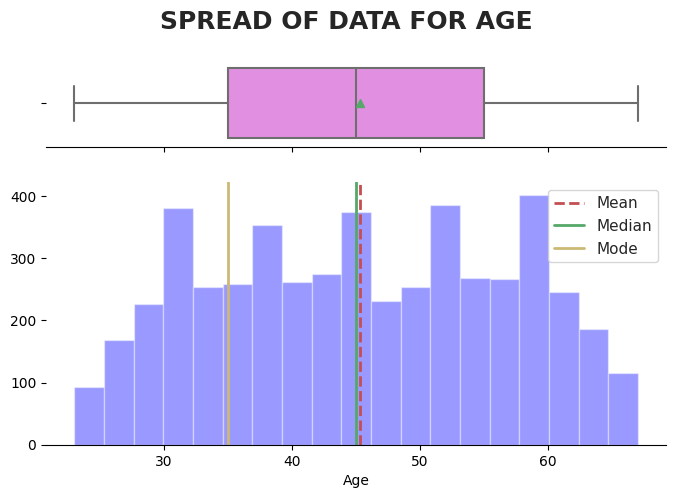

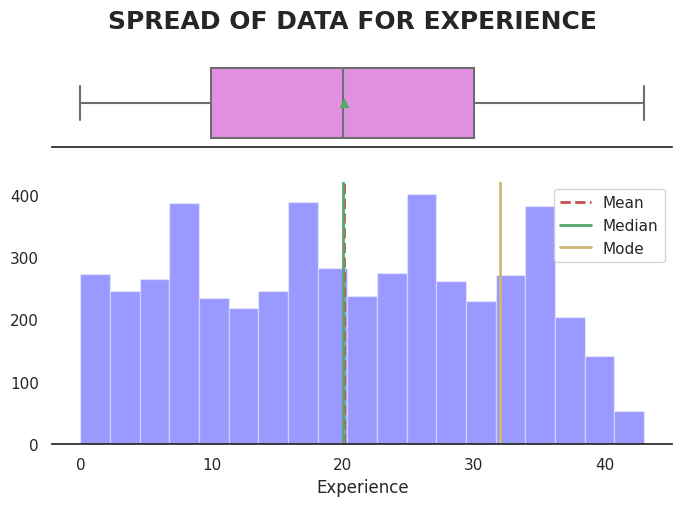

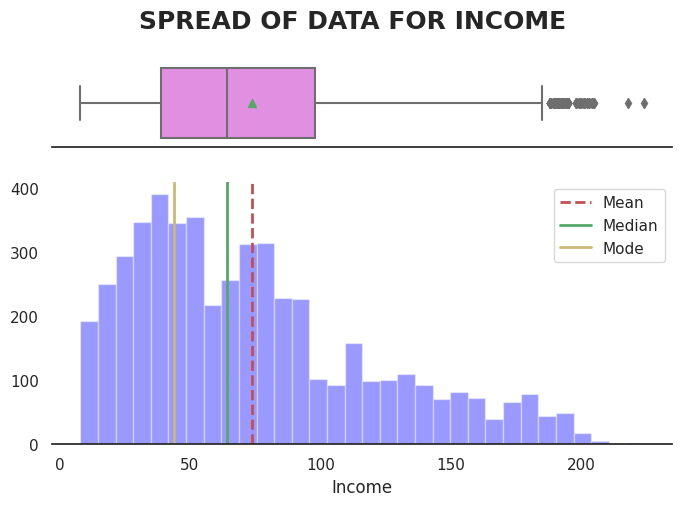

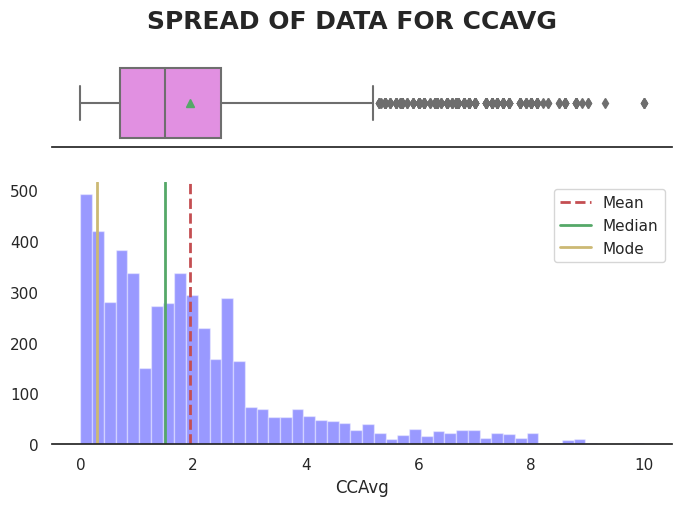

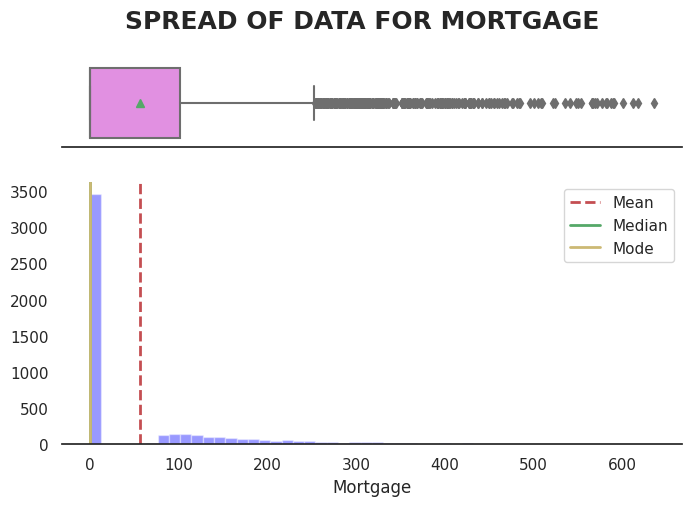

In [ ]:
#select all quantitative columns for checking the spread
list_col=  ['Age','Experience','Income','CCAvg','Mortgage']
for i in range(len(list_col)):
    dist_box(df_loan[list_col[i]])

 **Observations:**

* Age and experience both has same distrubtion with spike at 5 points.
* Income is right skewed and has some outliers on higher side which can be clipped.
* Average montly credit is right skewed and has lot of outliers on higher side which can be clipped.
* Mortgage is mostly 0, but is right skewed and has lot of outlier on higher side which can be clipped.

**Age**


Age can be a vital factor in borrowing loan, converting ages to bin to explore if there is any pattern.

In [ ]:
df_loan['Agebin'] = pd.cut(df_loan['Age'], bins = [0, 30, 40, 50, 60, 100],
                           labels = ['18-30', '31-40', '41-50', '51-60', '60-100'])

**Income**

Divided the customers on the basis of income to understand customers segments.

In [ ]:
# Create a new variable - Income group

df_loan["Income_group"] = pd.cut(
    x=df["Income"],
    bins=[0, 50, 140, 224],
    labels=["Lower", "Middle", "High"],
)

In [ ]:
df_loan.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County,Agebin,Income_group
0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0,Los Angeles County,18-30,Lower
1,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0,Los Angeles County,41-50,Lower
2,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0,Alameda County,31-40,Lower
3,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0,San Francisco County,31-40,Middle
4,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1,Los Angeles County,31-40,Lower


**Spending on credit card**

To understand customers' spending, deriving new columns which will say if customer belongs to Upper , middle or lower spending.

In [ ]:
df_loan.CCAvg.describe()

count   5000.00000
mean       1.93794
std        1.74766
min        0.00000
25%        0.70000
50%        1.50000
75%        2.50000
max       10.00000
Name: CCAvg, dtype: float64

In [ ]:
df_loan["Spending_group"] = pd.cut( x=df_loan["CCAvg"], bins=[0.00000, 0.70000, 2.50000, 10.00000],
    labels=["Low", "Medium", "High"],include_lowest=True)

In [ ]:
df_loan.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County,Agebin,Income_group,Spending_group
0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0,Los Angeles County,18-30,Lower,Medium
1,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0,Los Angeles County,41-50,Lower,Medium
2,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0,Alameda County,31-40,Lower,Medium
3,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0,San Francisco County,31-40,Middle,High
4,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1,Los Angeles County,31-40,Lower,Medium


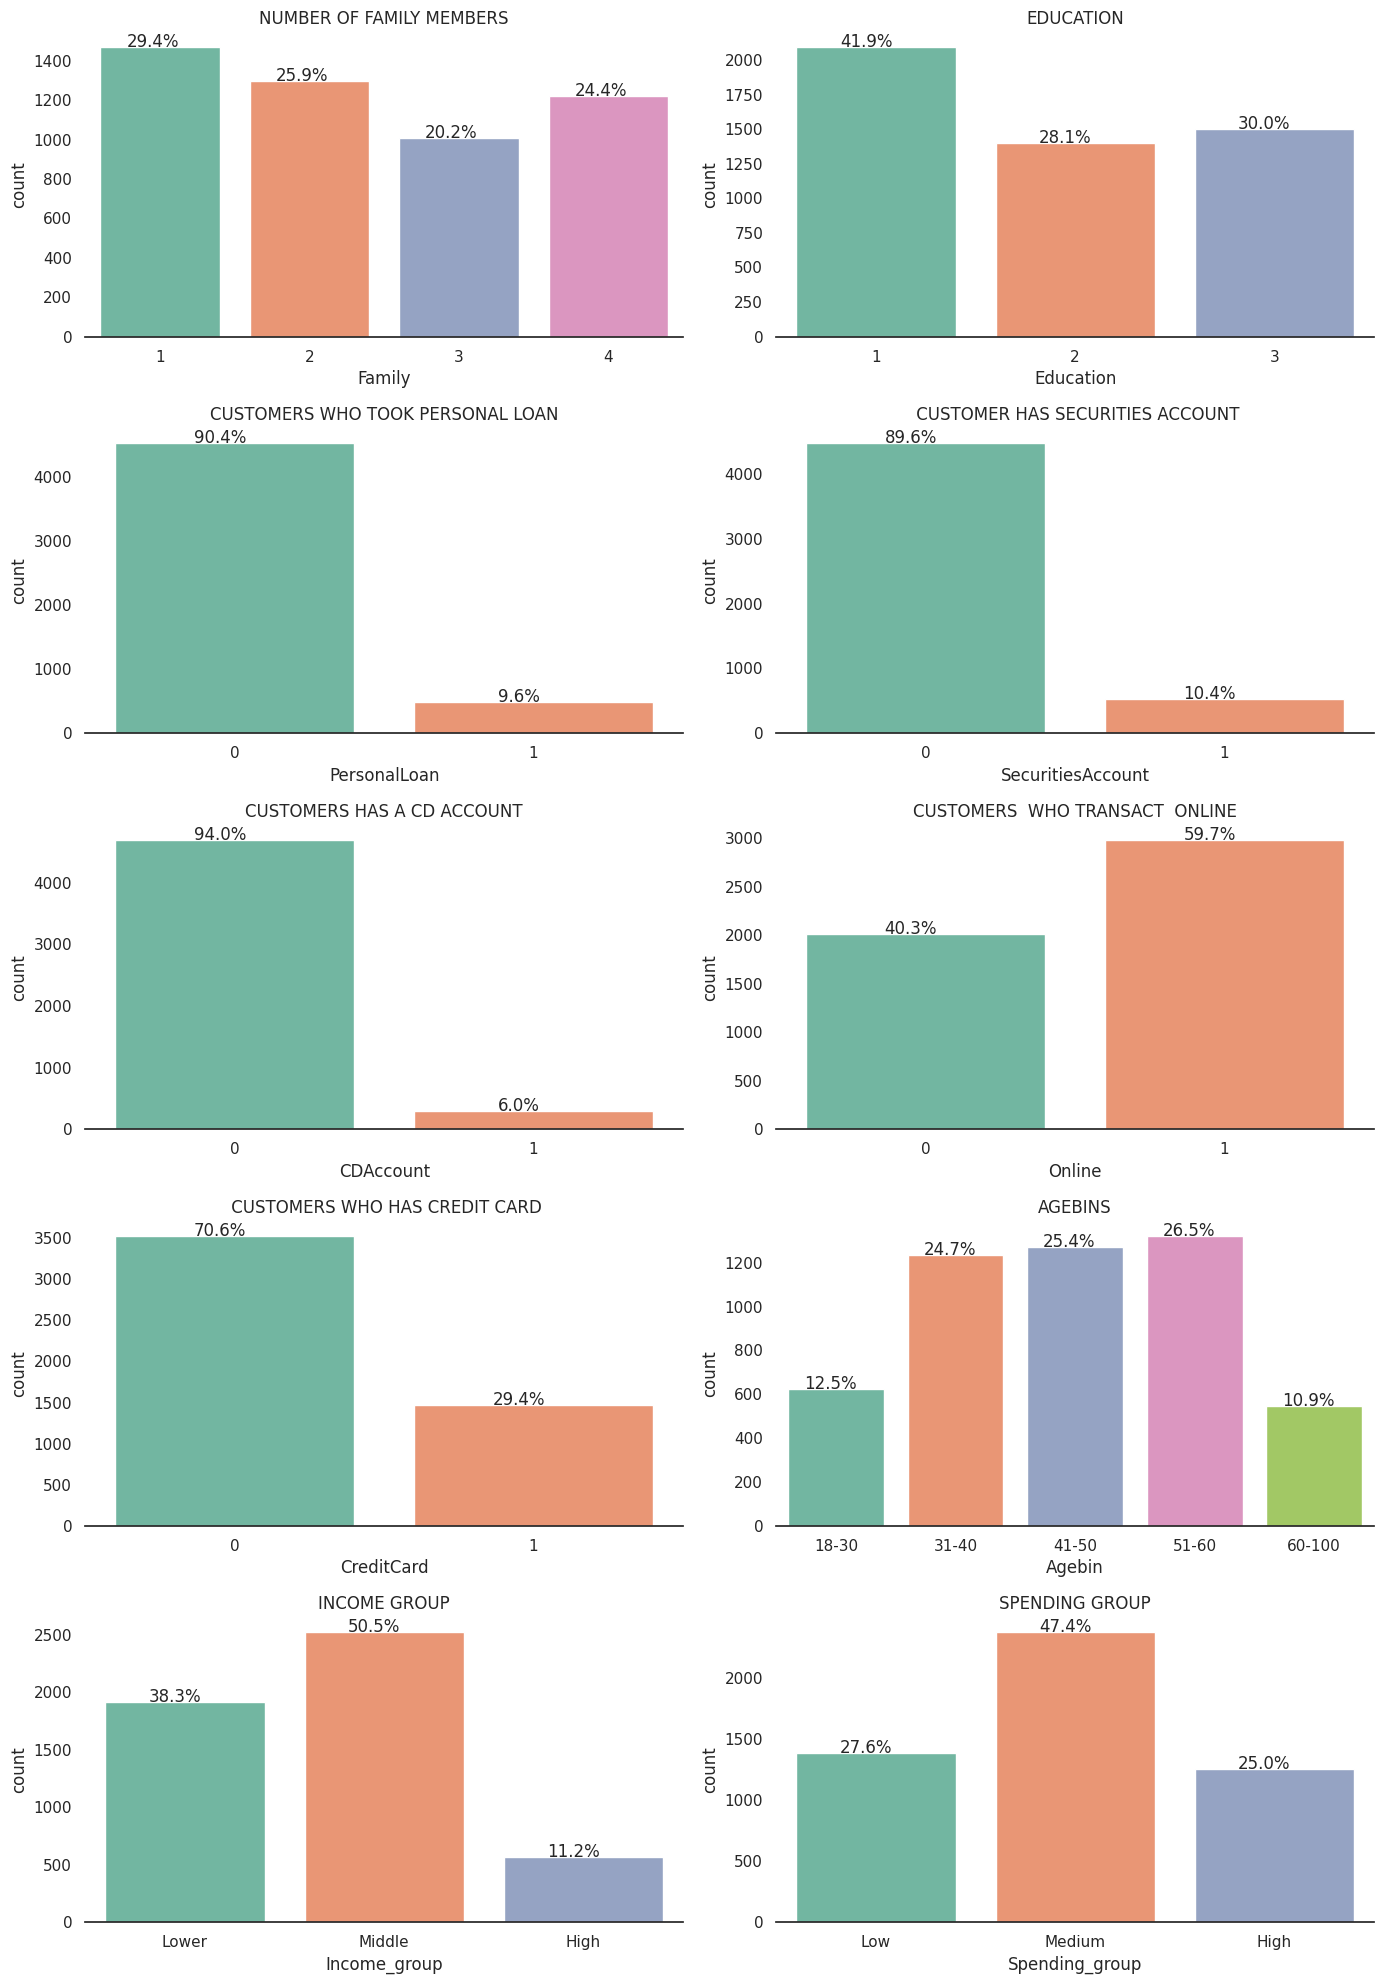

In [ ]:
# Making a list of all categorical variables
cat_columns = ['Family','Education','PersonalLoan','SecuritiesAccount',
               'CDAccount','Online','CreditCard','Agebin','Income_group','Spending_group']
title=['Number of Family members','Education','Customers who took Personal Loan',
       ' Customer has Securities Account','Customers has a CD Account',
       'Customers  who transact  Online',' Customers who has Credit Card','Agebins',"Income group",'Spending group']
plt.figure(figsize=(14,20))

sns.set_theme(style="white") # just trying to make visualisation better. This will set background to white
#list_palette=['Blues_r','Greens_r','Purples_r','Reds_r','Blues_r','Greens_r','Purples_r','Reds_r','Blues_r']

for i, variable in enumerate(cat_columns):
                     plt.subplot(5,2,i+1)
                     order = df_loan[variable].value_counts(ascending=False).index
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=df_loan[variable], data=df_loan )
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_loan[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper())

**Observations:**

* ~29.4 % customers are single.
* ~41.9% customers are undergrad.
* only ~9.6% bought a personal loan from the bank.
* 10.4 % customers have a securities account with the bank
* 6 % customer have a CD account.
* 60% customers transact online.
* 29.4% customers have credit cards.
* ~ 75 % of customers are in range of 31- 60.
* ~ 50 % Most of bank customers belong to middle income group.
* ~ 48 % of customers has medium Average spending

In [ ]:
df_loan.groupby(['County','PersonalLoan'])['PersonalLoan'].agg({'size'}).unstack()

size     
PersonalLoan              0    1
County                          
9307                      1    0
96651                     6    0
Alameda County          456   44
Butte County             17    2
Contra Costa County      73   12
El Dorado County         16    1
Fresno County            24    2
Humboldt County          30    2
Imperial County           3    0
Kern County              47    7
Lake County               4    0
Los Angeles County      984  111
Marin County             48    6
Mendocino County          7    1
Merced County             4    0
Monterey County         113   15
Napa County               3    0
Orange County           333   33
Placer County            22    2
Riverside County         50    6
Sacramento County       169   15
San Benito County        14    0
San Bernardino County    98    3
San Diego County        509   59
San Francisco County    238   19
San Joaquin County       12    1
San Luis Obispo County   28    5
San Mateo County        192   12
Santa Barbara County    143   11
Santa Clara County      492   71
Santa Cruz County        60    8
Shasta County            15    3
Siskiyou County           7    0
Solano County            30    3
Sonoma County            22    6
Stanislaus County        14    1
Trinity County            4    0
Tuolumne County           7    0
Ventura County          103   11
Yolo County             122    8

<Axes: ylabel='County'>

<Figure size 1000x2000 with 0 Axes>

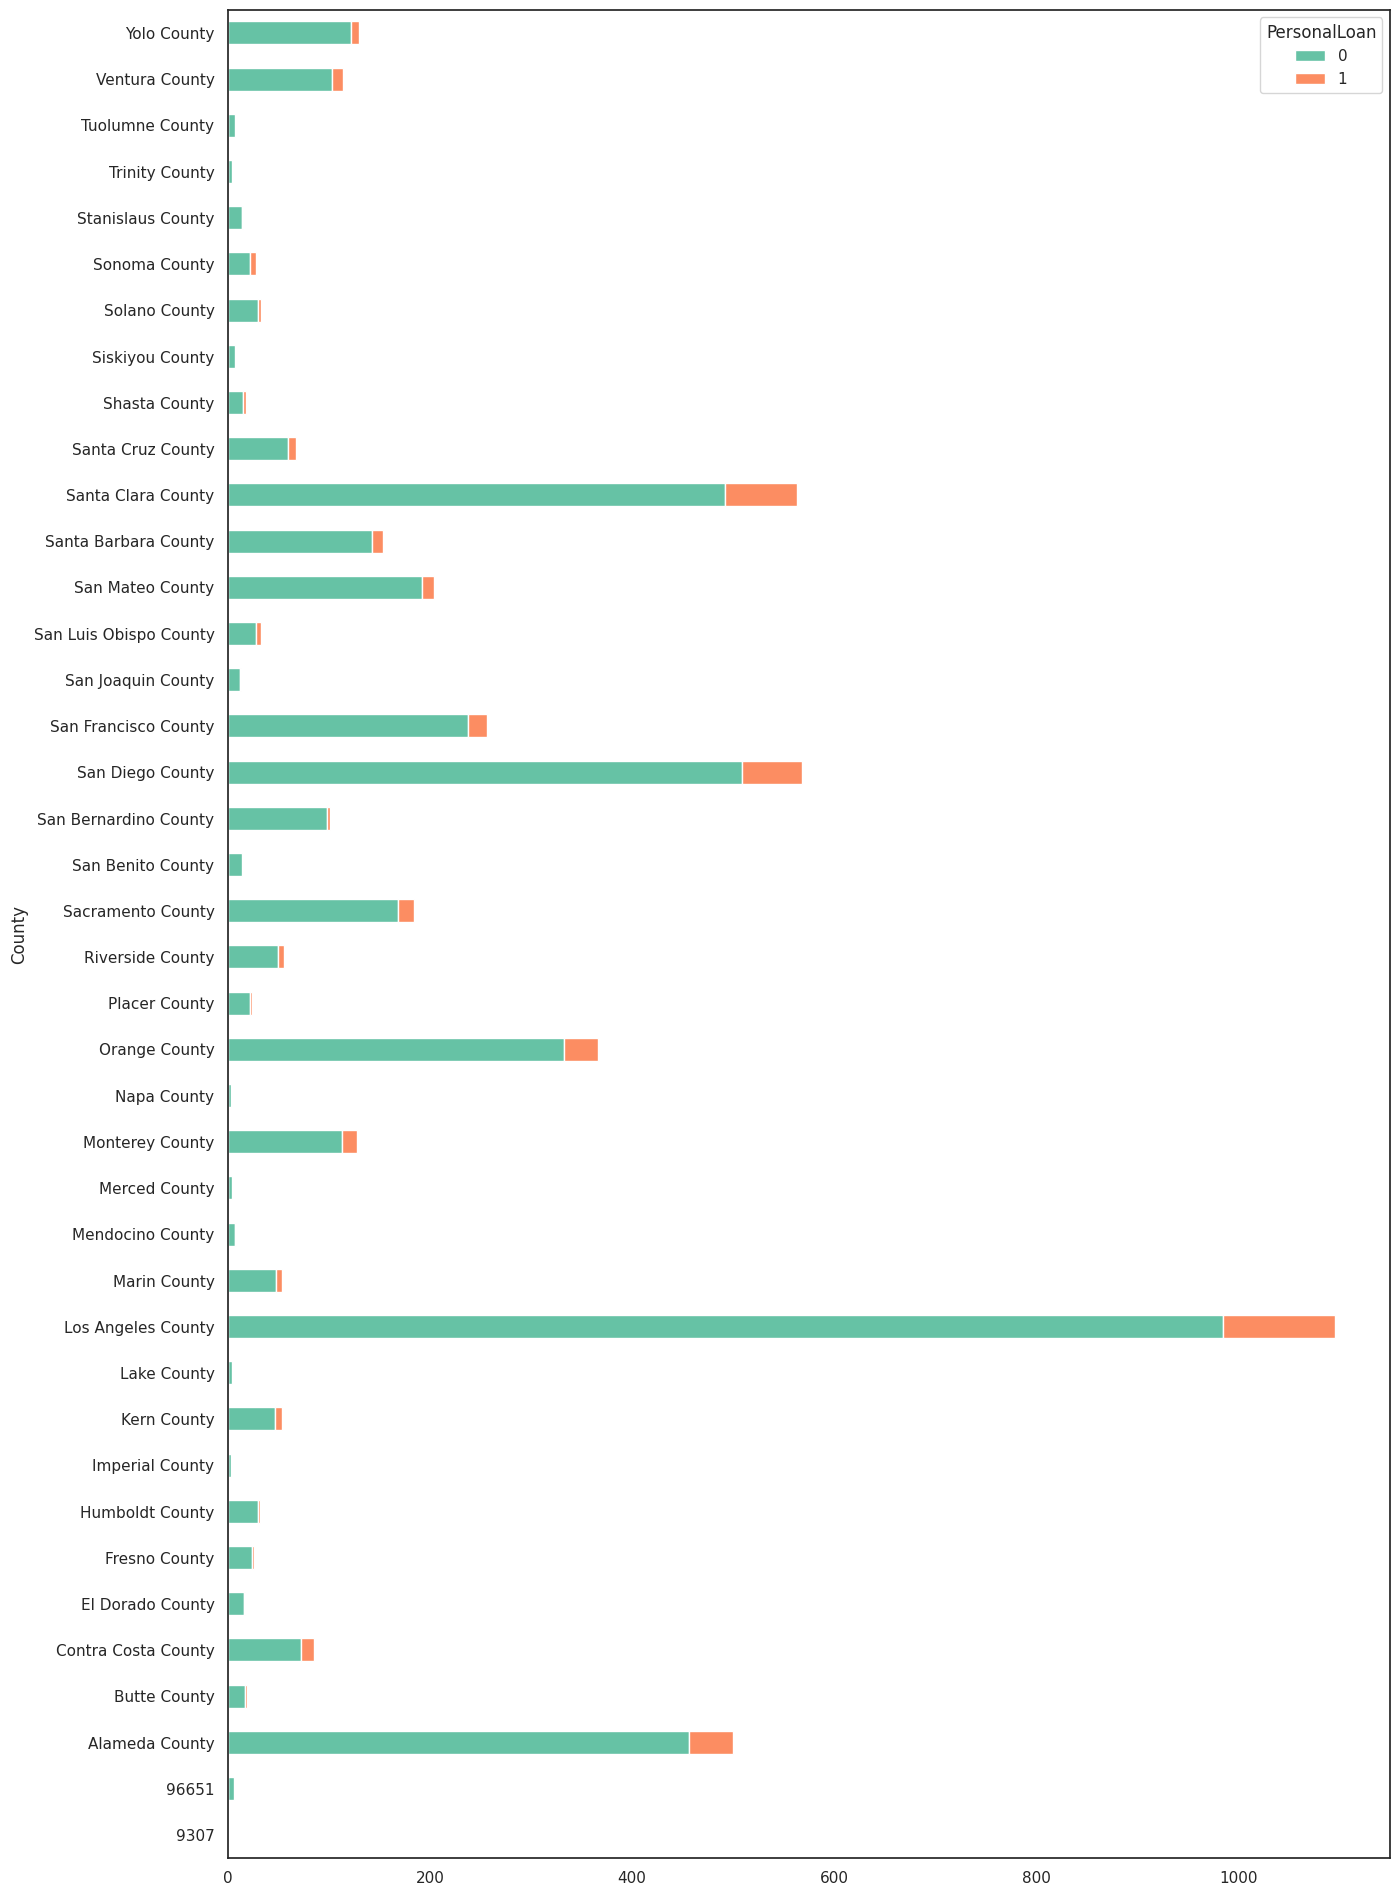

In [ ]:
# Number of customers from each county is plotted, with borrower and non-borrower data being separated.
plt.figure(figsize=(10,20))
pd.crosstab(index=df_loan['County'],columns=df_loan['PersonalLoan'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(15,24))

In [ ]:
# converting the counties into regions based on https://www.calbhbc.org/region-map-and-listing.html
counties = {
'Los Angeles County':'Los Angeles Region',
'San Diego County':'Southern',
'Santa Clara County':'Bay Area',
'Alameda County':'Bay Area',
'Orange County':'Southern',
'San Francisco County':'Bay Area',
'San Mateo County':'Bay Area',
'Sacramento County':'Central',
'Santa Barbara County':'Southern',
'Yolo County':'Central',
'Monterey County':'Bay Area',
'Ventura County':'Southern',
'San Bernardino County':'Southern',
'Contra Costa County':'Bay Area',
'Santa Cruz County':'Bay Area',
'Riverside County':'Southern',
'Kern County':'Southern',
'Marin County':'Bay Area',
'San Luis Obispo County':'Southern',
'Solano County':'Bay Area',
'Humboldt County':'Superior',
'Sonoma County':'Bay Area',
'Fresno County':'Central',
'Placer County':'Central',
'Butte County':'Superior',
'Shasta County':'Superior',
'El Dorado County':'Central',
'Stanislaus County':'Central',
'San Benito County':'Bay Area',
'San Joaquin County':'Central',
'Mendocino County':'Superior',
'Tuolumne County':'Central',
'Siskiyou County':'Superior',
'Trinity County':'Superior',
'Merced County':'Central',
'Lake County':'Superior',
'Napa County':'Bay Area',
'Imperial County':'Southern',
93077:'Southern',
96651:'Bay Area'
}

In [ ]:
df_loan['Regions'] = df_loan['County'].map(counties)

In [ ]:
df_loan.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County,Agebin,Income_group,Spending_group,Regions
0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0,Los Angeles County,18-30,Lower,Medium,Los Angeles Region
1,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0,Los Angeles County,41-50,Lower,Medium,Los Angeles Region
2,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0,Alameda County,31-40,Lower,Medium,Bay Area
3,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0,San Francisco County,31-40,Middle,High,Bay Area
4,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1,Los Angeles County,31-40,Lower,Medium,Los Angeles Region


In [ ]:
df_loan['Regions'].unique()

array(['Los Angeles Region', 'Bay Area', 'Southern', 'Superior',
       'Central', nan], dtype=object)

In [ ]:
df_loan.isnull().sum()

Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
County               0
Agebin               0
Income_group         0
Spending_group       0
Regions              1
dtype: int64

In [ ]:
df_loan.dropna(inplace=True)

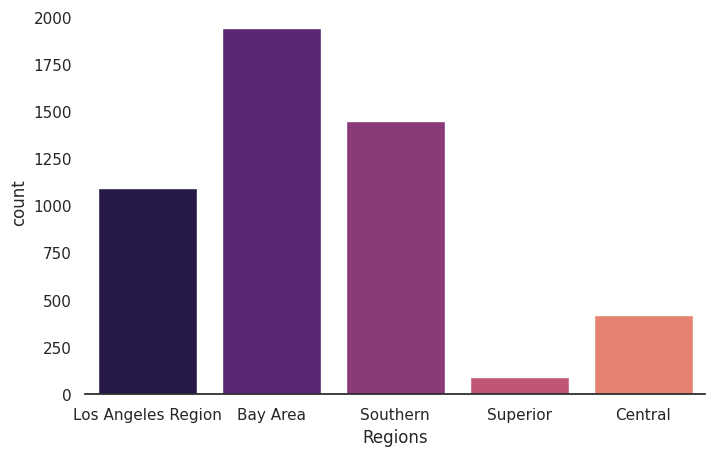

In [ ]:
plt.figure(figsize=(8,5))
sns.set_palette('magma')
sns.countplot(data=df_loan,x=df_loan['Regions'])
sns.despine(top=True,right=True,left=True) # to remove side line from graph

## **Bivariate and Multivariate Analysis**

In [ ]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                4999 non-null   int64   
 1   Experience         4999 non-null   int64   
 2   Income             4999 non-null   int64   
 3   ZIPCode            4999 non-null   category
 4   Family             4999 non-null   category
 5   CCAvg              4999 non-null   float64 
 6   Education          4999 non-null   category
 7   Mortgage           4999 non-null   int64   
 8   PersonalLoan       4999 non-null   category
 9   SecuritiesAccount  4999 non-null   category
 10  CDAccount          4999 non-null   category
 11  Online             4999 non-null   category
 12  CreditCard         4999 non-null   category
 13  County             4999 non-null   category
 14  Agebin             4999 non-null   category
 15  Income_group       4999 non-null   category
 16  Spendi

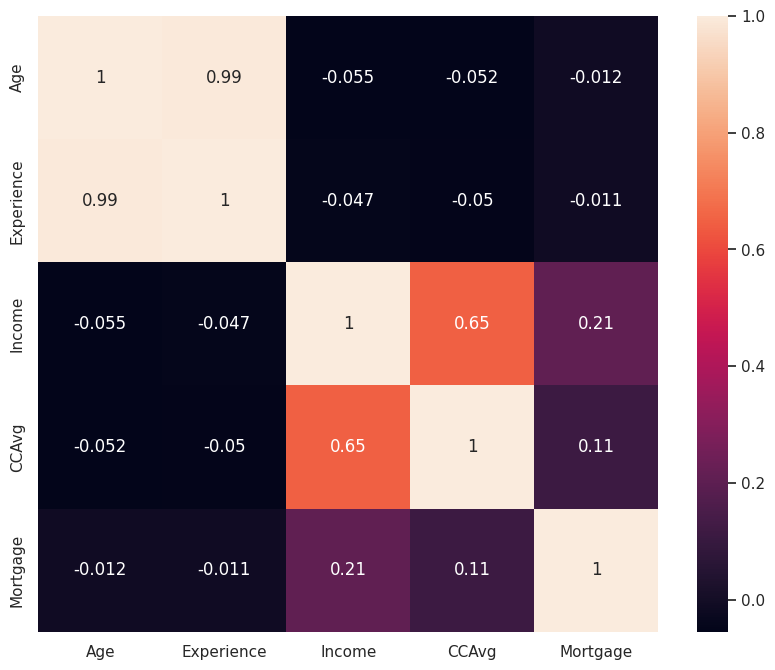

In [ ]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(10,8))
sns.heatmap(df_loan.corr(),annot=True)
plt.show()

**Observations**

* As expected Age and experience are highly correlated and one of them can be dropped.Since we had to handle 0, will drop experience.
* Income and Average spending on credit card are positively corrleated.
* Mortgage has very little correlation with income.

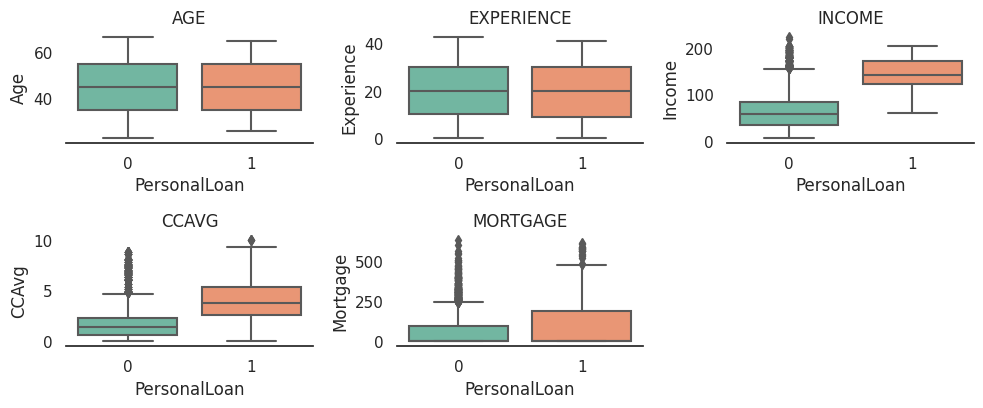

In [ ]:
# Box plots
numeric_columns = ['Age','Experience','Income','CCAvg','Mortgage']
plt.figure(figsize=(10,20))

sns.set_palette(sns.color_palette("Set2", 8))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)

        sns.boxplot(x='PersonalLoan',y= df_loan[variable], data=df_loan)
        sns.despine(top=True,right=True,left=True) # to remove side line from graph
        plt.tight_layout()
        plt.title(variable.upper())

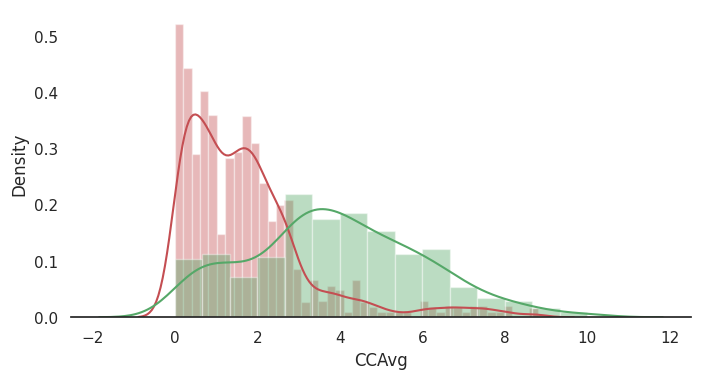

In [ ]:
# Distribution plot
plt.figure(figsize=(8,4))
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['CCAvg'], color = 'r')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]['CCAvg'], color = 'g')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

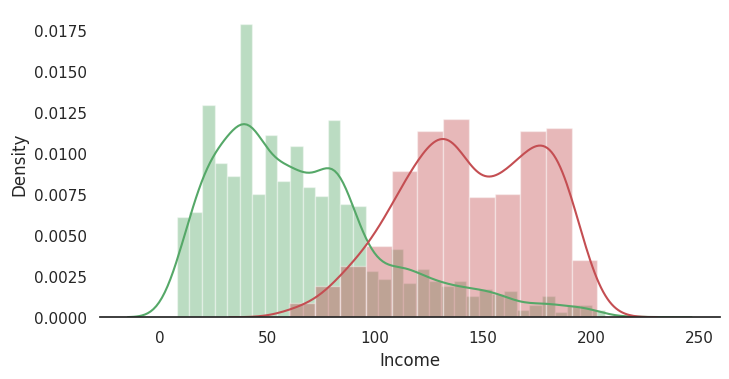

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['Income'], color = 'g')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]['Income'], color = 'r')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

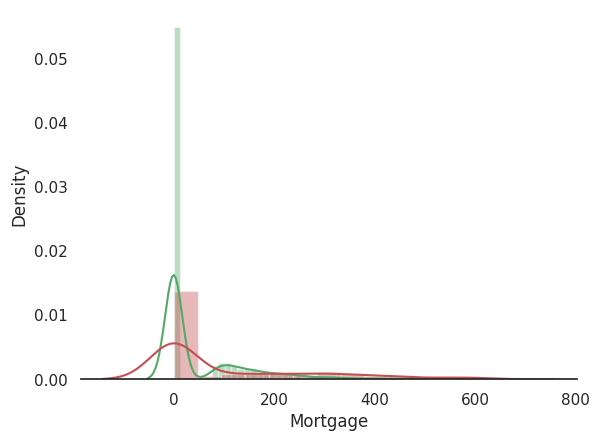

In [ ]:
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['Mortgage'], color = 'g')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]['Mortgage'], color = 'r')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

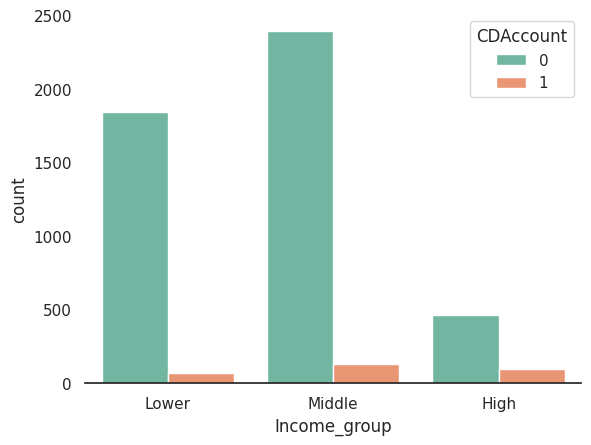

In [ ]:
sns.countplot(x='Income_group',hue='CDAccount',data=df_loan)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

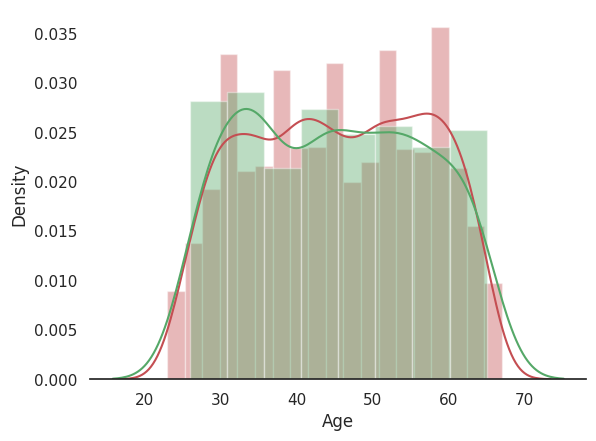

In [ ]:
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['Age'], color = 'r')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]['Age'], color = 'g')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

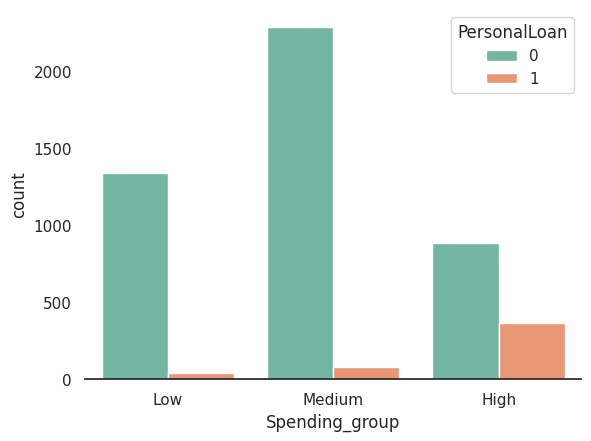

In [ ]:
sns.countplot(x='Spending_group',hue='PersonalLoan',data=df_loan)

sns.despine(top=True,right=True,left=True) # to remove side line from graph

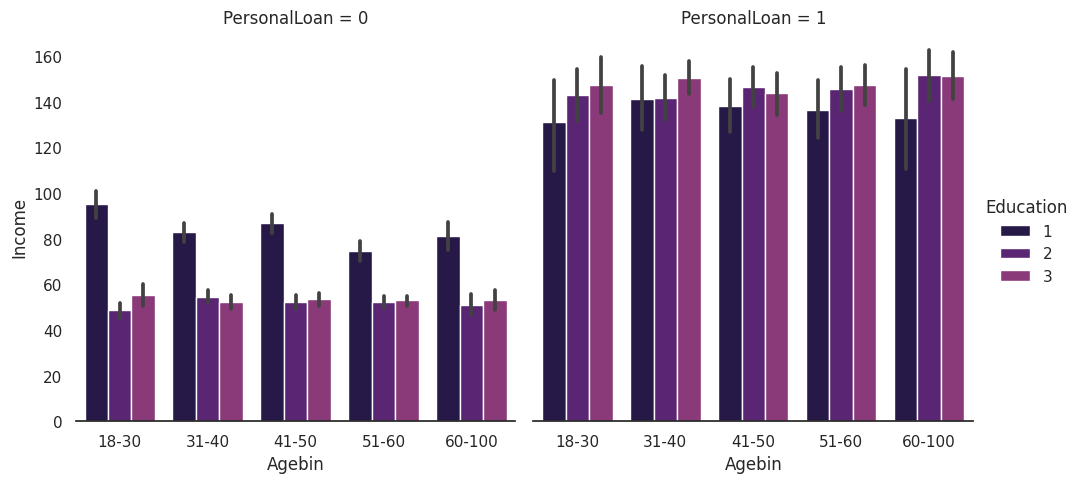

In [ ]:
sns.set_palette('magma')
sns.catplot(y='Income',x='Agebin',hue='Education',kind='bar',col="PersonalLoan", data=df_loan)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

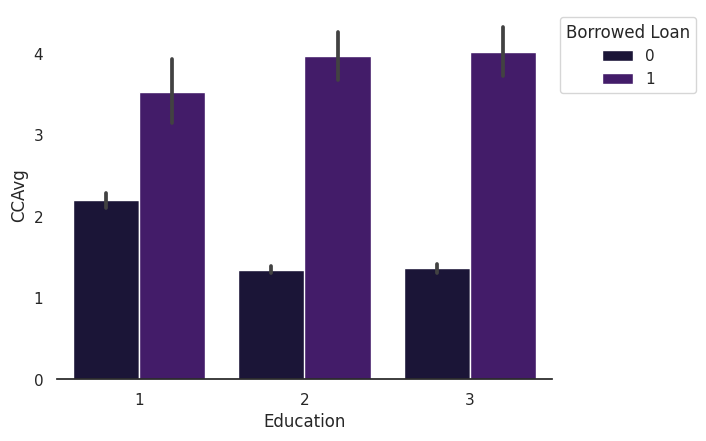

In [ ]:
sns.set_palette(sns.color_palette("magma", 8))
sns.barplot(y='CCAvg',x='Education', hue='PersonalLoan',data=df_loan)
labels=["No","Yes"]
plt.legend(loc="upper left", title="Borrowed Loan",bbox_to_anchor=(1,1))
sns.despine(top=True,right=True,left=True) # to remove side line from graph

**Observations**

* People with higher income had opted for personal loan before.
* People with high mortgages opted for loan.
* Customers with higher average monthly credit usage have opted for loan.
* Customers with higher income had higher average credit card spending.
* Graduate and Advanced/Professional have higher monthly credit card usage and have borrowed loans with the bank.

In [ ]:
# Function to plot stacked bar chart
def stacked_plot(x):
    sns.set_palette(sns.color_palette("magma", 8))
    tab1 = pd.crosstab(x,df_loan['PersonalLoan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df_loan['PersonalLoan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(7,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="Borrowed Loan",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    #plt.legend(labels)
    plt.show()

PersonalLoan     0    1   All
Family                       
1             1365  107  1472
2             1190  106  1296
3              877  133  1010
4             1087  134  1221
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


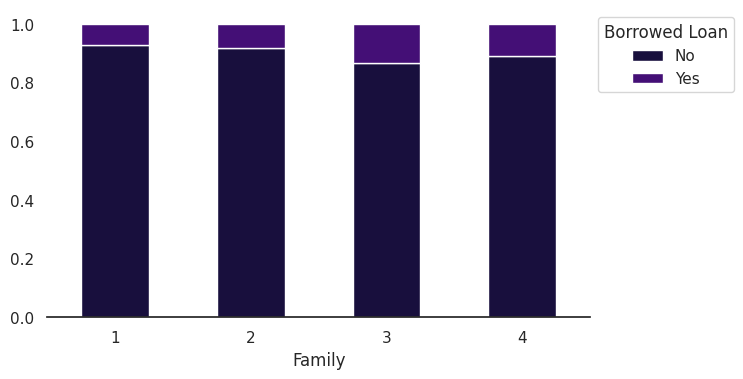

PersonalLoan     0    1   All
Education                    
1             2003   93  2096
2             1221  182  1403
3             1295  205  1500
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


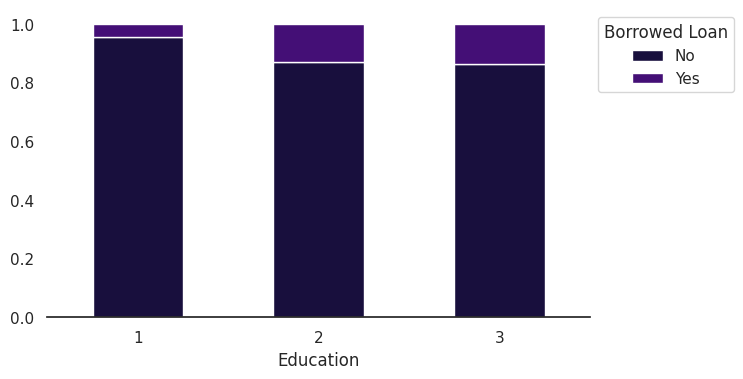

PersonalLoan          0    1   All
SecuritiesAccount                 
0                  4057  420  4477
1                   462   60   522
All                4519  480  4999
------------------------------------------------------------------------------------------------------------------------


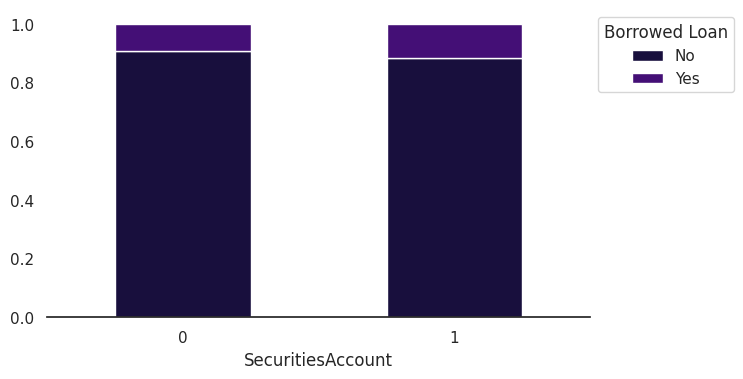

PersonalLoan     0    1   All
CDAccount                    
0             4357  340  4697
1              162  140   302
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


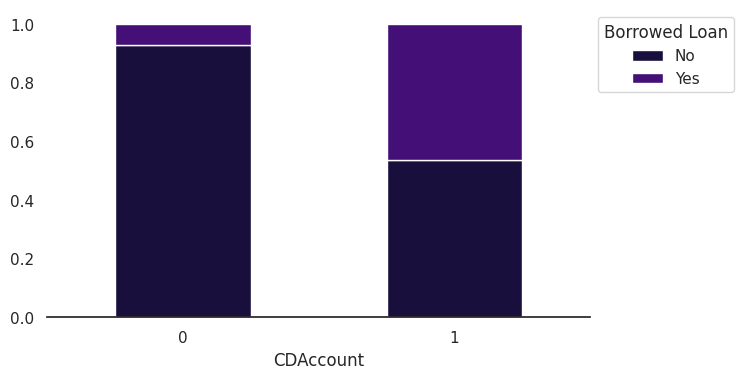

PersonalLoan     0    1   All
CreditCard                   
0             3193  337  3530
1             1326  143  1469
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


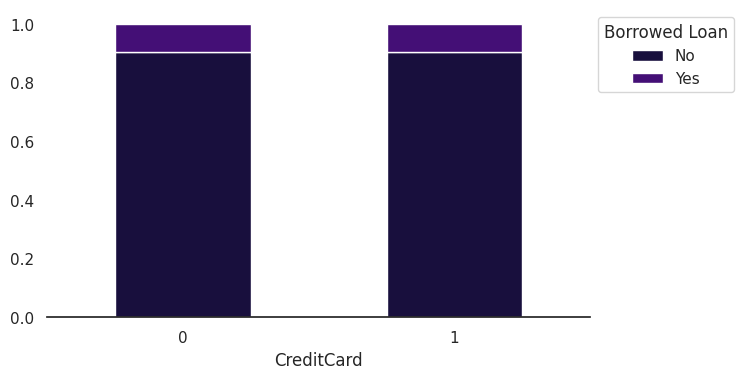

PersonalLoan     0    1   All
Online                       
0             1827  189  2016
1             2692  291  2983
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


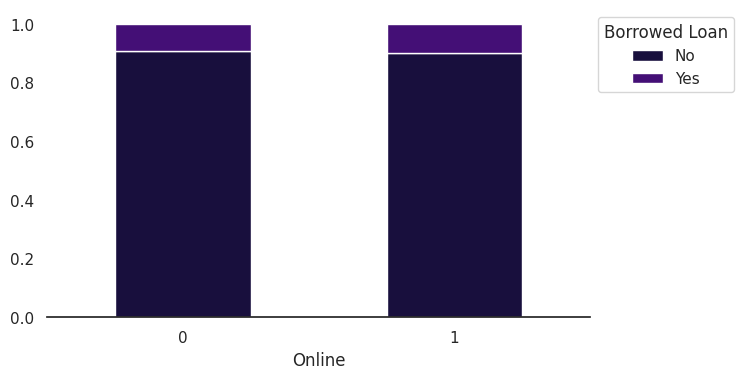

PersonalLoan           0    1   All
Regions                            
Bay Area            1747  196  1943
Central              390   30   420
Los Angeles Region   984  111  1095
Southern            1314  135  1449
Superior              84    8    92
All                 4519  480  4999
------------------------------------------------------------------------------------------------------------------------


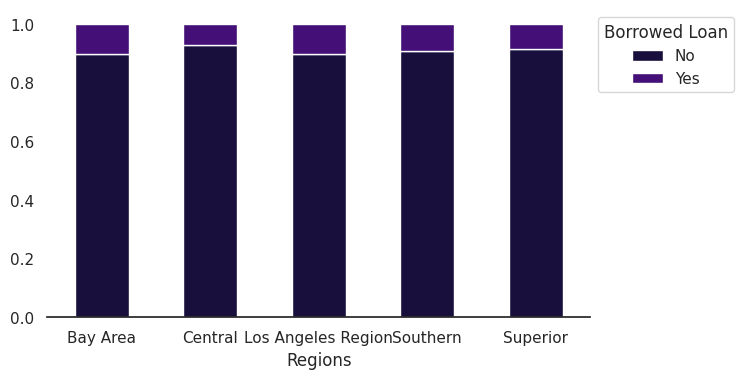

PersonalLoan     0    1   All
Agebin                       
18-30          558   66   624
31-40         1118  118  1236
41-50         1148  122  1270
51-60         1207  115  1322
60-100         488   59   547
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


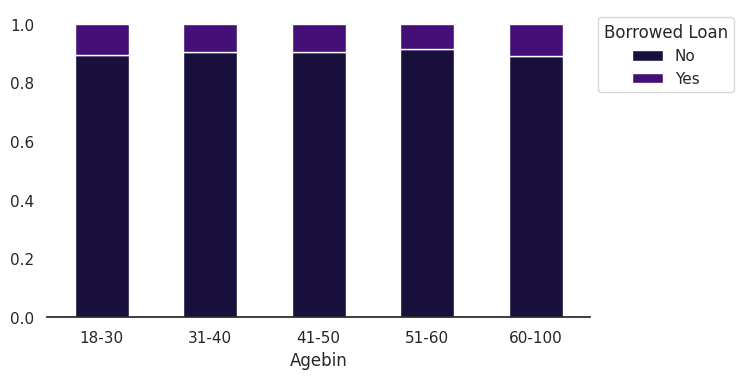

PersonalLoan     0    1   All
Income_group                 
Lower         1913    0  1913
Middle        2301  223  2524
High           305  257   562
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


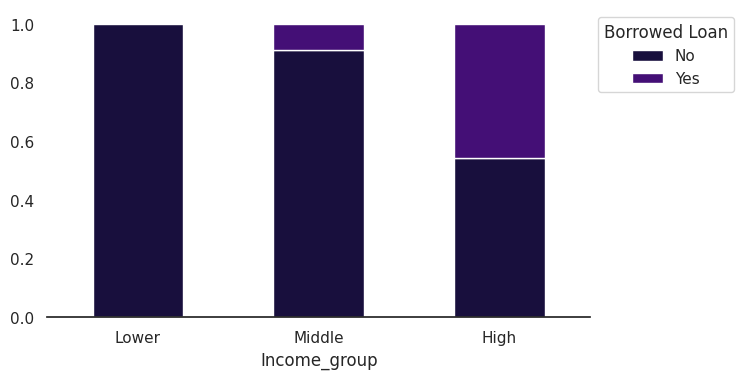

PersonalLoan       0    1   All
Spending_group                 
Low             1341   39  1380
Medium          2292   79  2371
High             886  362  1248
All             4519  480  4999
------------------------------------------------------------------------------------------------------------------------


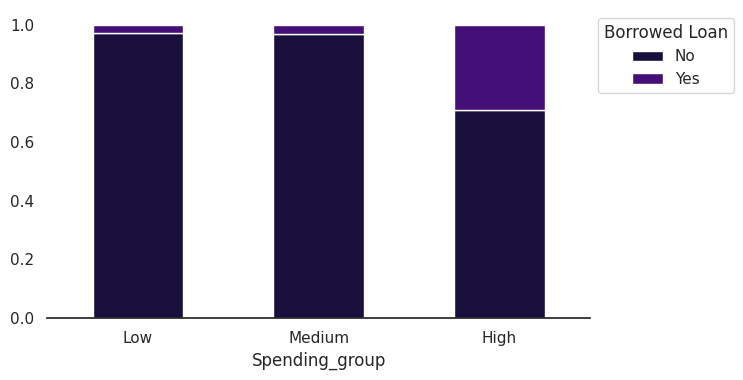

In [ ]:
cat_columns=['Family','Education','SecuritiesAccount','CDAccount','CreditCard','Online','Regions','Agebin','Income_group','Spending_group']
for i, variable in enumerate(cat_columns):
       stacked_plot(df_loan[variable])

**Observations**

* Number of Customers with Family size of 3 and 4 who had borrowed loans from the bank is greater than other family size.
* Customers who had higher education bought loan in large numbers.
* Customers who had certificate of deposit with the bank had previously borrowed loan
* Customers using Online facilities has no impact on personal loan
* Majority customers who did have Personal loan with the bank did not used CrediCard from other banks.
* Majority customers who had take personal loan before are from LosAngeles and Bay region.
* Ratio of borrowing loan is high in 30 and below and 60 and above customers but large number of customers borrowing loan lies in age range 30-60.
* Ratio of borrowing loan is high for high income customers.
* Customer with high average Monthly spending on credit card have bought personal loan before.


As expected Age and experience are highly correlated and one of them can be dropped. Since experience had negative values dropping experience would be better option.

Text(0.5, 1.0, 'Correlation Heatmap')

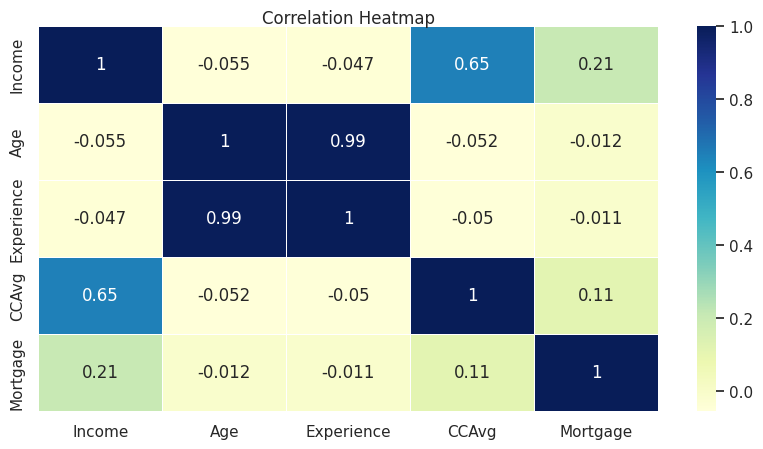

In [ ]:
plt.figure(figsize=(10,5))
numerical=['Income','Age','Experience','CCAvg','Mortgage']

# A better color to see the positive or negative correlation of each variable
heatmap = sns.heatmap(df_loan[numerical].corr(), annot=True, cmap='YlGnBu',linewidths=0.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=2)

([<matplotlib.patches.Wedge at 0x7d509ceb73a0>,
 [Text(-1.0503312798154913, 0.3268091226406516, ''),
  Text(1.0503312721659712, -0.3268091472254298, '')],
 [Text(-0.5729079708084497, 0.1782595214403554, '90.4%'),
  Text(0.5729079666359843, -0.1782595348502344, '9.6%')])

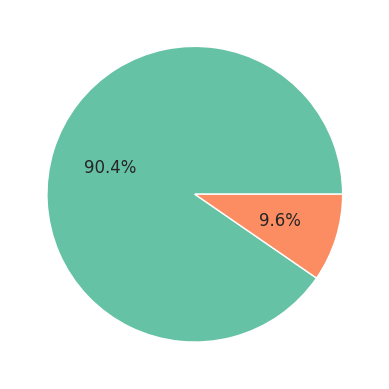

In [ ]:
sns.set_palette('Set2')
plt.pie(data=df_loan,x=df_loan["PersonalLoan"].value_counts(),autopct='%1.1f%%')

The target variable personal_loan is highly imbalanced where only 9.6% of the customers have previously opted for a personal loan in the dataset.

In [ ]:
df_loan.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County,Agebin,Income_group,Spending_group,Regions
0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0,Los Angeles County,18-30,Lower,Medium,Los Angeles Region
1,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0,Los Angeles County,41-50,Lower,Medium,Los Angeles Region
2,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0,Alameda County,31-40,Lower,Medium,Bay Area
3,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0,San Francisco County,31-40,Middle,High,Bay Area
4,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1,Los Angeles County,31-40,Lower,Medium,Los Angeles Region


In [ ]:
# Saving dataset before treating outliers for logistic regression.
df_Decision = df_loan.copy()

In [ ]:
df_Decision.to_csv('/content/drive/MyDrive/Personal Loan /df_Decision.csv',index=False)

# **Insights based on EDA**

**Summary of EDA**

**Data Description:**

* Dependent variable is the Personal_loan which is of categorical data type.
* Age, Experience, Income,mortage ,CCavg are of integer type while other variables are of categorical type
* There were no missing values in the dataset.

**Data Cleaning:**

* We observed that some observations where experience was -ve but since there was a strong correlation with age , we made it +ve.
* There are 450 unique zipcode, we mapped it to counties. They were further mapped to regions to reduce the dimension of data and we now have only 5 distinct values in the data.
* We also created Age bin ,Spending group and Income group to analyse if there is any pattern in buying loan based on these.

**Observations from EDA:**

* People with higher income had opted for personal loan before.
* People with high mortgages opted for loan.
* Customers will higher average monthly credit usage have opted for loan.
* Customers with Family of 3 members had borrowed the loans with the bank.
* Education level 2: Graduate and 3: Advanced/Professional have borrowed loans with the bank.
* Majority of customers who bought Personal loan with the bank used Online facilities.
* Majority customers who had taken personal loan before are from Los Angeles region.
* Ratio of borrowing loan is high in 30 and below and 60 and above customers.

**Customer segmentation for borrowing loan based on EDA**

* Customer with Higher income have higher mortages and higher monthly average spending.They also have certificate of deposit with the bank.They are our high profile clients.
* Few Customer in medium income group don't have higher mortages and have less average monthly credit card spending.They are average profile clients.
* Customer in lower income group have less mortages( few outliers are there), less monthly spending. They are our low profile clients.

**Outlier Detection**

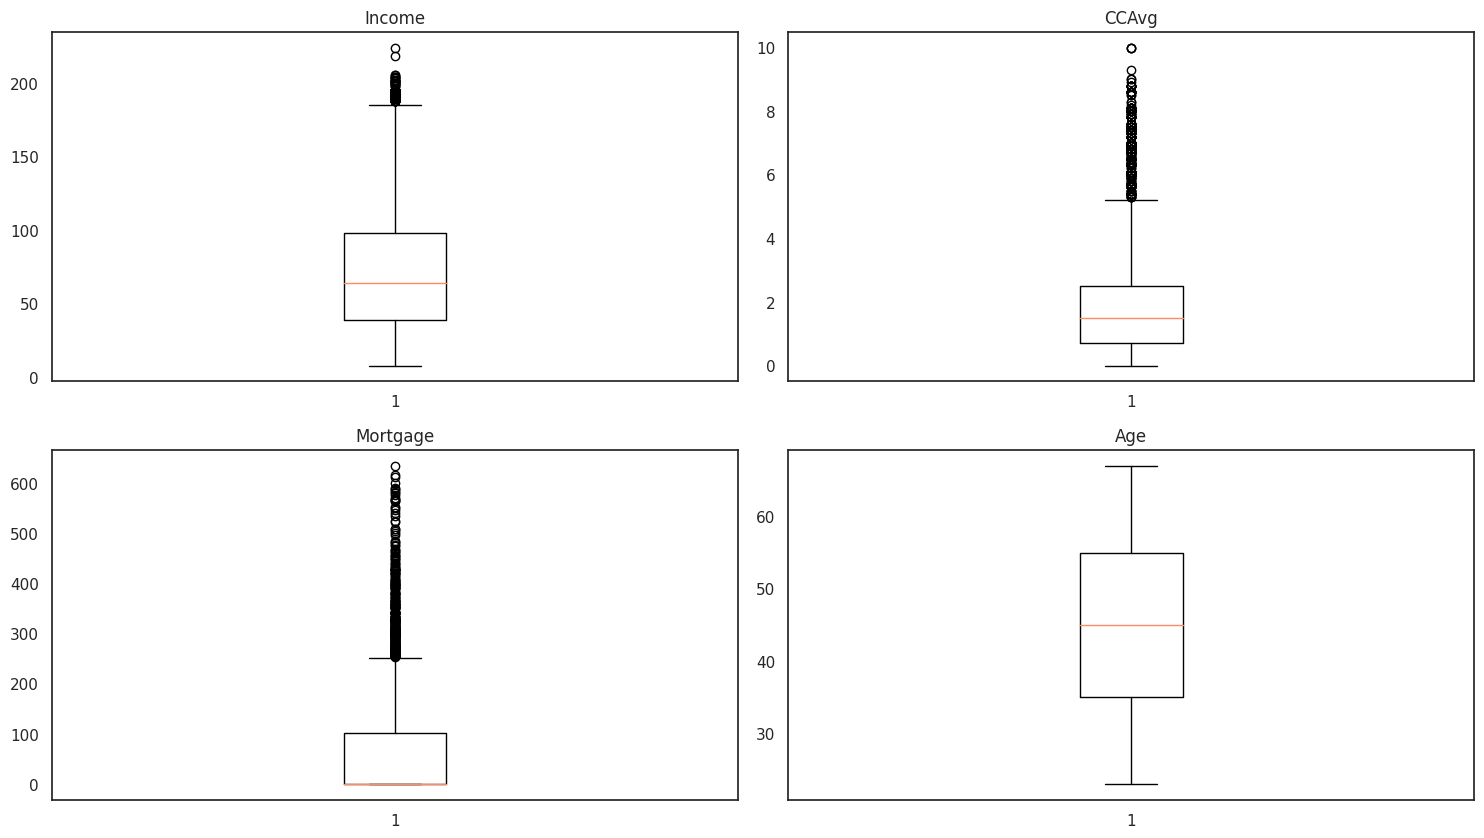

In [ ]:
numeric_columns =['Income','CCAvg','Mortgage','Age']
# outlier detection using boxplot
plt.figure(figsize=(15,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(6,2,i+1)
                     plt.boxplot(df_loan[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [ ]:
Q1 = df_loan.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = df_loan.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [ ]:
n_outliers=((df_loan.select_dtypes(include=['int64','float64'])<lower) | (df_loan.select_dtypes(include=['int64','float64'])>upper)).sum()
(n_outliers/len(df_loan))*100


Age          0.00000
Experience   0.00000
Income       1.92038
CCAvg        6.48130
Mortgage     5.82116
dtype: float64

In [ ]:
df['Income'].describe()

count   5000.00000
mean      73.77420
std       46.03373
min        8.00000
25%       39.00000
50%       64.00000
75%       98.00000
max      224.00000
Name: Income, dtype: float64

In [ ]:
# Check Income extreme values
df_loan.sort_values(by=["Income"],ascending = False).head(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County,Agebin,Income_group,Spending_group,Regions
3896,48,24,224,93940,2,6.67000,1,0,0,0,1,1,1,Monterey County,41-50,High,High,Bay Area
4993,45,21,218,91801,2,6.67000,1,0,0,0,0,1,0,Los Angeles County,41-50,High,High,Los Angeles Region
526,26,2,205,93106,1,6.33000,1,271,0,0,0,0,1,Santa Barbara County,18-30,High,High,Southern
2988,46,21,205,95762,2,8.80000,1,181,0,1,0,1,0,El Dorado County,41-50,High,High,Central
677,46,21,204,92780,2,2.80000,1,0,0,0,0,1,0,Orange County,41-50,High,High,Southern


In [ ]:
# Check Mortgage extreme values
df_loan.sort_values(by=["Mortgage"],ascending = False).head(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County,Agebin,Income_group,Spending_group,Regions
2934,37,13,195,91763,2,6.50000,1,635,0,0,0,1,0,San Bernardino County,31-40,High,High,Southern
303,49,25,195,95605,4,3.00000,1,617,1,0,0,0,0,Yolo County,41-50,High,High,Central
4812,29,4,184,92126,4,2.20000,3,612,1,0,0,1,0,San Diego County,18-30,High,Medium,Southern
1783,53,27,192,94720,1,1.70000,1,601,0,0,0,1,0,Alameda County,51-60,High,Medium,Bay Area
4842,49,23,174,95449,3,4.60000,2,590,1,0,0,0,0,Mendocino County,41-50,High,High,Superior


In [ ]:
# Check CCAVg extreme values
df_loan.sort_values(by=["CCAvg"],ascending = False).head(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County,Agebin,Income_group,Spending_group,Regions
2101,35,5,203,95032,1,10.00000,3,0,1,0,0,0,0,Santa Clara County,31-40,High,High,Bay Area
2337,43,16,201,95054,1,10.00000,2,0,1,0,0,0,1,Santa Clara County,41-50,High,High,Bay Area
787,45,15,202,91380,3,10.00000,3,0,1,0,0,0,0,Los Angeles County,41-50,High,High,Los Angeles Region
3943,61,36,188,91360,1,9.30000,2,0,1,0,0,0,0,Ventura County,60-100,High,High,Southern
1339,52,25,180,94545,2,9.00000,2,297,1,0,0,1,0,Alameda County,51-60,High,High,Bay Area


In [ ]:
outliers_columns =['Income','CCAvg','Mortgage']
for col in outliers_columns:
  Q1 = df_loan[col].quantile(0.25)
  Q3 = df_loan[col].quantile(0.75)

  IQR = Q3 - Q1
  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR
  print('Outliers in',col,'is : ')
  print(df_loan[df_loan[col]>upper].shape)
  print('-'*30)


Outliers in Income is : 
(96, 18)
------------------------------
Outliers in CCAvg is : 
(324, 18)
------------------------------
Outliers in Mortgage is : 
(291, 18)
------------------------------


We can select whether to eliminate or treat outliers after identifying them. Depending on the situation, I won't treat them as outliers here (in terms of income, mortgage value, average credit card usage, etc.). Instead, I'll let my model discover the underlying trend for these consumers.

In [ ]:
df_loan.head(2)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County,Agebin,Income_group,Spending_group,Regions
0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0,Los Angeles County,18-30,Lower,Medium,Los Angeles Region
1,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0,Los Angeles County,41-50,Lower,Medium,Los Angeles Region


In [ ]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                4999 non-null   int64   
 1   Experience         4999 non-null   int64   
 2   Income             4999 non-null   int64   
 3   ZIPCode            4999 non-null   category
 4   Family             4999 non-null   category
 5   CCAvg              4999 non-null   float64 
 6   Education          4999 non-null   category
 7   Mortgage           4999 non-null   int64   
 8   PersonalLoan       4999 non-null   category
 9   SecuritiesAccount  4999 non-null   category
 10  CDAccount          4999 non-null   category
 11  Online             4999 non-null   category
 12  CreditCard         4999 non-null   category
 13  County             4999 non-null   category
 14  Agebin             4999 non-null   category
 15  Income_group       4999 non-null   category
 16  Spendi

In [ ]:
#drop column which we don't need for modelling
df_loan.drop(columns=["Agebin", "ZIPCode","County",'Experience','Income_group','Spending_group'], inplace=True)

In [ ]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                4999 non-null   int64   
 1   Income             4999 non-null   int64   
 2   Family             4999 non-null   category
 3   CCAvg              4999 non-null   float64 
 4   Education          4999 non-null   category
 5   Mortgage           4999 non-null   int64   
 6   PersonalLoan       4999 non-null   category
 7   SecuritiesAccount  4999 non-null   category
 8   CDAccount          4999 non-null   category
 9   Online             4999 non-null   category
 10  CreditCard         4999 non-null   category
 11  Regions            4999 non-null   object  
dtypes: category(7), float64(1), int64(3), object(1)
memory usage: 269.4+ KB


We have 6 categorical independent variables but 4 of them are binary, so we'll have the same results with them even after creating dummies So we will only make dummies for Regions and Education.

In [ ]:
X = df_loan.drop(['PersonalLoan'], axis=1)
Y = df_loan['PersonalLoan']

oneHotCols=['Regions','Education']
X=pd.get_dummies(X,columns=oneHotCols,drop_first=True)

In [ ]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 2,stratify=Y)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

In [ ]:
def make_confusion_matrix(y_actual,y_predict,title):
    fig, ax = plt.subplots(1, 1)

    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Greens',colorbar=True,ax=ax)
    ax.set_title(title)
    plt.show()

In [ ]:
# Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score

def get_metrics_score(model,X_train,X_test,y_train,y_test,flag=True):

    score_list=[]       # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)


    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)

    train_acc = accuracy_score(y_train,pred_train)
    test_acc = accuracy_score(y_test,pred_test)

    train_recall = recall_score(y_train,pred_train)
    test_recall = recall_score(y_test,pred_test)

    train_precision = precision_score(y_train,pred_train)
    test_precision = precision_score(y_test,pred_test)

    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)


    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))

    if flag == True:
        score={
              'Train_data': [train_acc,train_recall,train_precision,train_f1,round(roc_auc_score(y_train,pred_train),3)],
              'Test_data': [test_acc,test_recall,test_precision,test_f1,round(roc_auc_score(y_test,pred_test),3)]
              }
        tab1 = pd.DataFrame(score,index=['Accuracy','Recall','Precision','F1 score','roc-auc-score'])
        print(tab1)
        make_confusion_matrix(y_train,pred_train,"Confusion Matrix for Train")
        make_confusion_matrix(y_test,pred_test,"Confusion Matrix for Test")

    return score_list # returning the list with train and test score

# **Model Building**

## **Logistic Regression**

**Model evaluation criterion**

Model can make wrong predictions as:
1. Predicting a person will buy a loan but he actually doesn't.(Loss of Resource)
2. Predicting a person will not buy a loan but he actually does.(Loss of Opportunity)

2nd case is more important to us .A potential customer is missed by the sales/marketing team .It's lost of opportunity.So we want to minimize this loss.The whole purpose of the campagin is to bring in more customers.

**Need to reduce False Negatives**

* The biggest loss we could experience in this scenario is not being able to identify a potential consumer. Recall is the appropriate metric to evaluate the effectiveness of the model.Banks strive to maximise recall since a higher recall reduces the likelihood of false negative results.
* Although accuracy can be used, it would not be the best metric to assess the performance of the model given the unbalanced nature of the data.
* In order to increase the likelihood of accurately identifying both groups, Recall should be maximised.




In [ ]:
lr = LogisticRegression(solver='saga',random_state=1,fit_intercept=False,class_weight={0:0.15,1:0.85})
lr.fit(X_train,y_train)

LogisticRegression(class_weight={0: 0.15, 1: 0.85}, fit_intercept=False,
                   random_state=1, solver='saga')

               Train_data  Test_data
Accuracy          0.65304    0.70000
Recall            0.97917    0.99306
Precision         0.21419    0.24155
F1 score          0.35150    0.38859
roc-auc-score     0.79900    0.83100


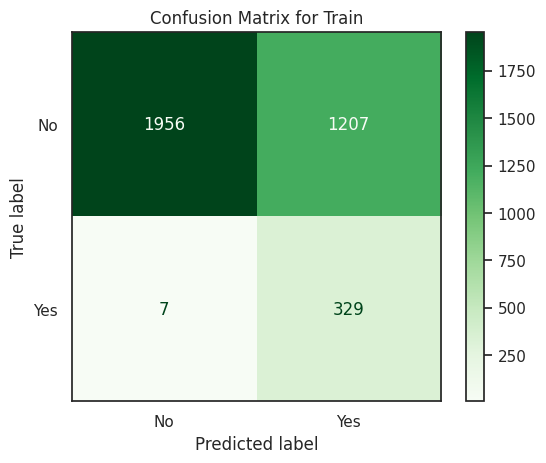

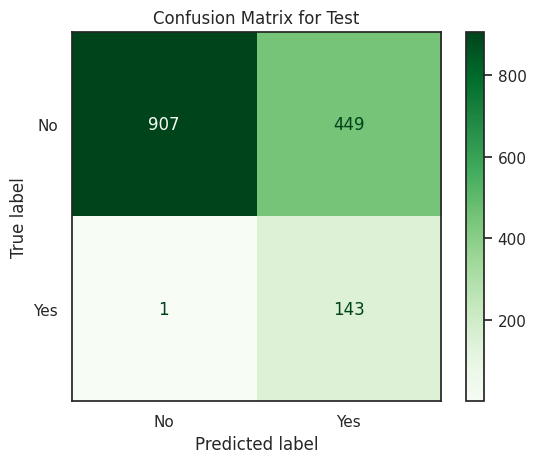

In [ ]:
# Let's check model performances for this model
scores_Sklearn_lr = get_metrics_score(lr,X_train,X_test,y_train,y_test,flag=True)

**Insights:**

**True Positives:**

- Reality: A customer wanted to take personal Loan. Model
- Prediction: The customer will take personal loan.
- Outcome: The model is good.

**True Negatives:**

- Reality: A customer didn't wanted to take personal loan.
- Model Prediction: The customer will not take personal loan. - Outcome: The business is unaffected .

**False Positives:**

Reality: A customer didn't want to take personal loan. Model Prediction: The customer will take personal loan. Outcome: The team which is targeting the potential customers would waste their resources on the customers who will not be buying a personal loan.

**False Negatives:**

* Reality: A customer wanted to take personal Loan. Model
* Prediction: The customer will not take personal loan.
* Outcome: The potential customer is missed by the sales team.

This is loss of oppurtunity.

**Right Metric to use:**
Here not able to identify a potential customer is the biggest loss we can face. Hence, Recall is the right metric to check the performance of the model. We have recall as 7 on train and 1 on test. We can improve accuracy by using Decision Trees.

Tuning Logistic Regression Model

In [ ]:
lr_tuned=LogisticRegression(class_weight={0:0.25,1:0.75},random_state=1)
parameters={
    'penalty':('l1','l2','elasticnet'),
    'C': [1,10,20,30]
    }

In [ ]:
grid=GridSearchCV(estimator=lr_tuned,param_grid=parameters,scoring='accuracy',cv=5)
grid=grid.fit(X_train,y_train)
lr_tuned=grid.best_estimator_
lr_tuned.fit(X_train,y_train)

LogisticRegression(C=1, class_weight={0: 0.25, 1: 0.75}, random_state=1)

               Train_data  Test_data
Accuracy          0.94513    0.94667
Recall            0.78869    0.78472
Precision         0.68653    0.69753
F1 score          0.73407    0.73856
roc-auc-score     0.87500    0.87400


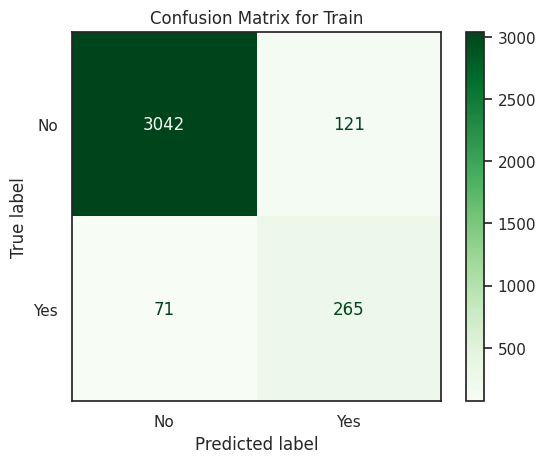

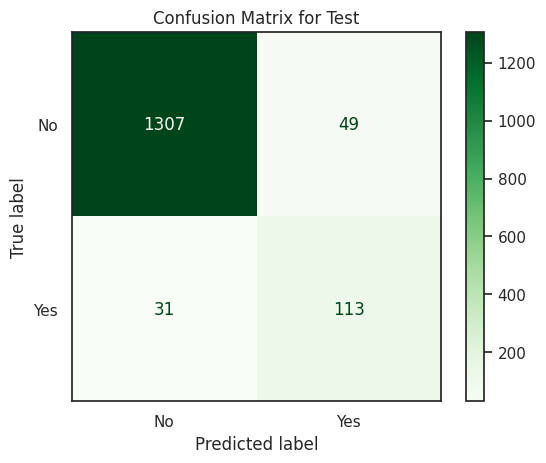

In [ ]:
# Let's check model performances for this model
scores_Sklearn_lr_tuned = get_metrics_score(lr_tuned,X_train,X_test,y_train,y_test,flag=True)

## **Support Vector Classifier**

In [ ]:
svc=SVC(kernel='linear',class_weight={0:0.15,1:0.85}, random_state=1)
svc.fit(X_train, y_train)

SVC(class_weight={0: 0.15, 1: 0.85}, kernel='linear', random_state=1)

               Train_data  Test_data
Accuracy          0.92512    0.93133
Recall            0.86905    0.86111
Precision         0.57255    0.59903
F1 score          0.69031    0.70655
roc-auc-score     0.90000    0.90000


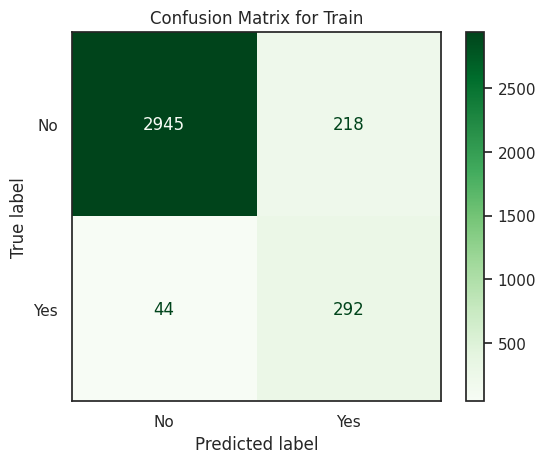

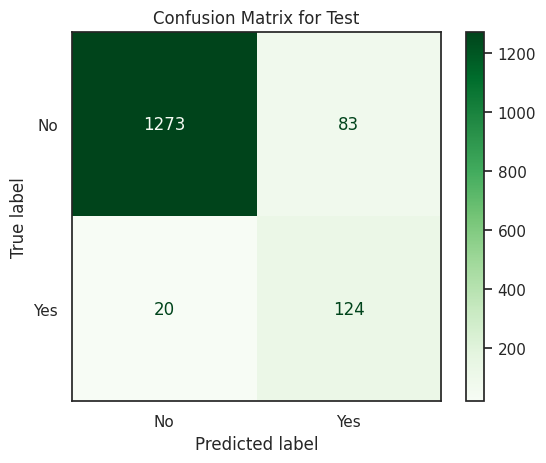

In [ ]:
# Let's check model performances for this model
scores_Sklearn_svc = get_metrics_score(svc,X_train,X_test,y_train,y_test,flag=True)

Tuning Support Vector Classifier

In [ ]:
svc_tuned=SVC(class_weight={0:0.25,1:0.75},random_state=1)
parameters = {
              'C': [0.01,0.1,1.0,10,100],
              'kernel': ('rbf','linear','poly','sigmoid'),
              }

In [ ]:
grid=GridSearchCV(estimator=svc_tuned,param_grid=parameters,scoring='accuracy',cv=5)
grid=grid.fit(X_train,y_train)
svc_tuned=grid.best_estimator_
svc_tuned.fit(X_train,y_train)

SVC(C=10, class_weight={0: 0.25, 1: 0.75}, kernel='poly', random_state=1)

               Train_data  Test_data
Accuracy          0.99057    0.97733
Recall            0.93750    0.84028
Precision         0.96330    0.91667
F1 score          0.95023    0.87681
roc-auc-score     0.96700    0.91600


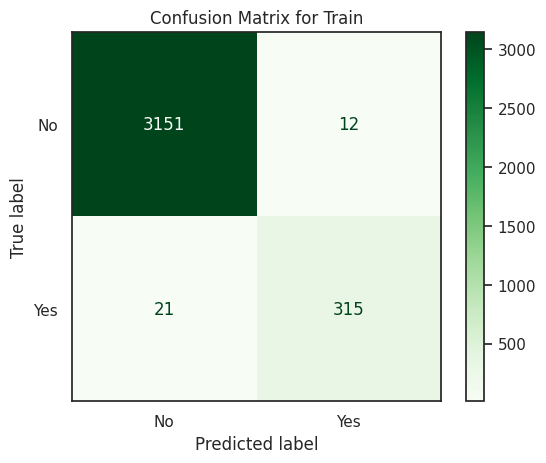

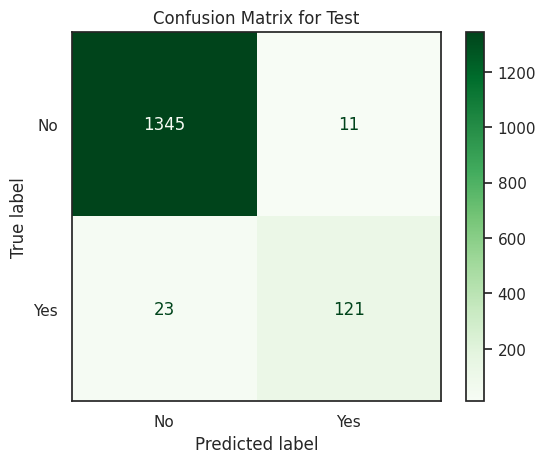

In [ ]:
# Let's check model performances for this model
scores_Sklearn_svc_tuned = get_metrics_score(svc_tuned,X_train,X_test,y_train,y_test,flag=True)

## **Decision Tree**

**Model Building:**
* We are using 'gini' criteria to split.
* To handle this imbalanced data set, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.
* class_weight is a hyperparameter for the decision tree classifier.
* Since not being able to identify a potential customer is the biggest loss as mentioned earlier with logistic regression. Hence, recall is the right metric to check the performance of the model.

In [ ]:
# since data is imbalanced adding weights
dt = DecisionTreeClassifier(criterion = 'gini',class_weight={0:0.15,1:0.85}, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

               Train_data  Test_data
Accuracy          1.00000    0.98400
Recall            1.00000    0.88889
Precision         1.00000    0.94118
F1 score          1.00000    0.91429
roc-auc-score     1.00000    0.94100


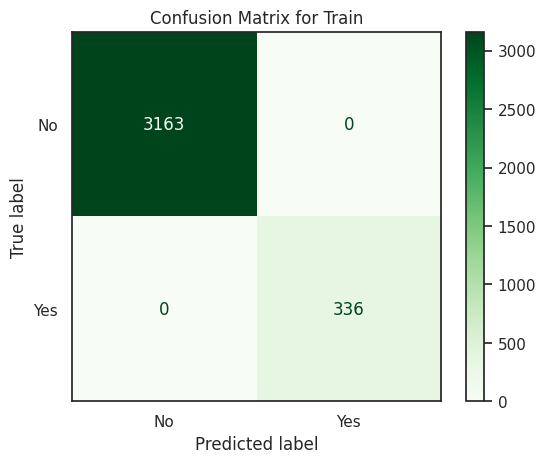

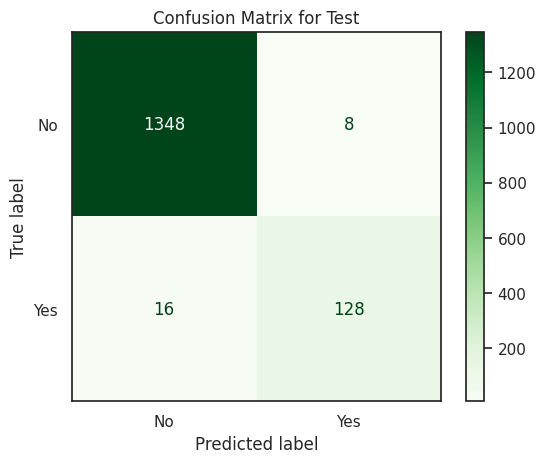

In [ ]:
# Let's check model performances for this model
scores_Sklearn_dt = get_metrics_score(dt,X_train,X_test,y_train,y_test,flag=True)

Decision tree tends to Overfit and the disparity between the Recall on Train and Test suggest that the model is overfitted.

Tuning Decision tree

In [ ]:
dt_tuned=DecisionTreeClassifier(class_weight={0:0.25,1:0.75},random_state=1)
parameters = {
              'max_depth': np.arange(1,10),
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [5, 10,15,20,25,30],
              }

In [ ]:
grid=GridSearchCV(estimator=dt_tuned,param_grid=parameters,scoring='accuracy',cv=5)
grid=grid.fit(X_train,y_train)
dt_tuned=grid.best_estimator_
dt_tuned.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.25, 1: 0.75}, max_depth=8,
                       max_leaf_nodes=30, random_state=1)

               Train_data  Test_data
Accuracy          0.99114    0.98400
Recall            0.98512    0.93056
Precision         0.92717    0.90541
F1 score          0.95527    0.91781
roc-auc-score     0.98800    0.96000


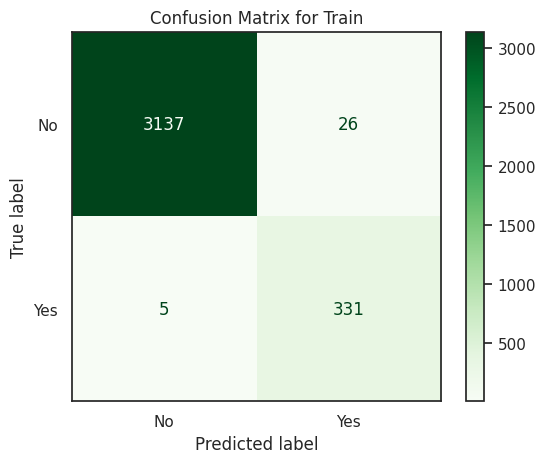

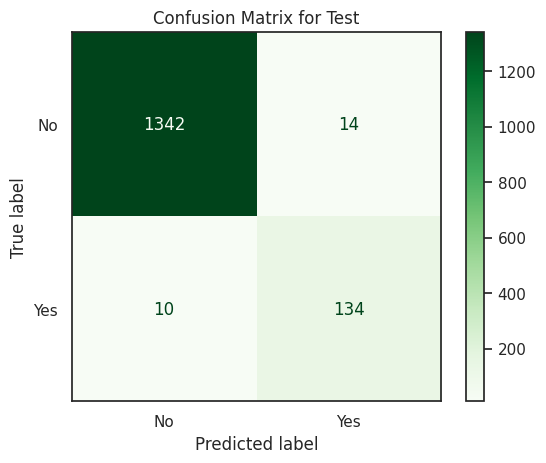

In [ ]:
# Let's check model performances for this model
scores_Sklearn_dt_tuned = get_metrics_score(dt_tuned,X_train,X_test,y_train,y_test,flag=True)

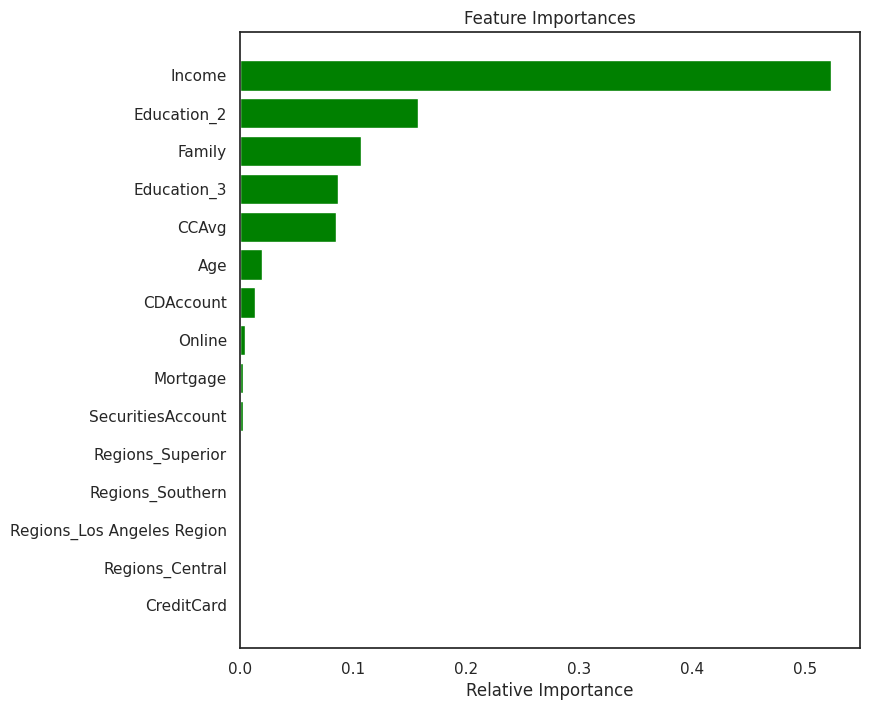

In [ ]:
feature_names = X.columns

importances = dt_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Conclusion**
* With HyperParameter max_depth=8, max_leaf_nodes=30, min_samples_leaf=2 the overfitting on train has reduced, but the recall for test has not improved.
* Important features are Income, Education level and family size, CCavg & Age.

In [ ]:

Data = [scores_Sklearn_lr, scores_Sklearn_lr_tuned, scores_Sklearn_svc, scores_Sklearn_svc_tuned, scores_Sklearn_dt, scores_Sklearn_dt_tuned]

comparison_frame = pd.DataFrame(data=Data,
                                index=['Logistic Regression', 'Tuned Logistic Regression', 'Support Vector Classifier', 'Tuned Support Vector Classifier', 'Decision Tree', 'Tuned Decision Tree'],
                                columns=['Train_accuracy', 'Test_accuracy', 'Train_recall', 'Test_recall', 'Train_precision', 'Test_precision', 'Train_f1', 'Test_f1'])


In [ ]:
comparison_frame

,Train_accuracy,Test_accuracy,Train_recall,Test_recall,Train_precision,Test_precision,Train_f1,Test_f1
Logistic Regression,0.65304,0.70000,0.97917,0.99306,0.21419,0.24155,0.35150,0.38859
Tuned Logistic Regression,0.94513,0.94667,0.78869,0.78472,0.68653,0.69753,0.73407,0.73856
Support Vector Classifier,0.92512,0.93133,0.86905,0.86111,0.57255,0.59903,0.69031,0.70655
Tuned Support Vector Classifier,0.99057,0.97733,0.93750,0.84028,0.96330,0.91667,0.95023,0.87681
Decision Tree,1.00000,0.98400,1.00000,0.88889,1.00000,0.94118,1.00000,0.91429
Tuned Decision Tree,0.99114,0.98400,0.98512,0.93056,0.92717,0.90541,0.95527,0.91781


# **Recommendation**

* Decision tress can easily overfit , so we have to be careful using decision tree.
* Based on EDA, logistic Regression , Decision tree , Income, Educatoin, Family and CCavg are most important factor.
* Therefore, we might have various consumer profiles for one campaign.
1. Prominent customers:- Higher income, higher education, three or more family members, high expenditure.
2. Average Profile Customers:- Middle-class, graduate-level educated, moderate spending
3. Low Profile customers:- Undergraduates, lower income customers, and low spenders.
* So, we need to target Prominent customers first and then Average Profile customers.